# Skin warts

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib as mpl
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import scanpy_plus

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white', color_map='viridis')
sc.logging.print_header()

/Users/vm11/SKIN_WARTS/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.10.3 anndata==0.10.9 umap==0.5.7 numpy==2.0.2 scipy==1.13.1 pandas==2.2.3 scikit-learn==1.6.1 statsmodels==0.14.4 igraph==0.11.8 pynndescent==0.5.13


In [6]:
with open("input_files.txt", "r") as f:
    input_files = f.read().splitlines()
input_files = [x for x in input_files if x]  # remove empty lines

In [7]:
input_files

['../data/BO1-BLD-0-SC-1a.h5',
 '../data/BO1-BLD-0-SC-1b.h5',
 '../data/BO2-BLD-0-SC-1a.h5',
 '../data/BO2-BLD-0-SC-1b.h5']

In [8]:
alist = []
for i in input_files:
    file_name = i.split("/")[-1].split(".")[0]
    print(file_name)
    adata = sc.read_10x_h5(i)
    adata.var_names_make_unique()
    adata.obs['sample_id'] = file_name
    adata.obs_names = adata.obs_names + "__" + file_name
    alist.append(adata)

BO1-BLD-0-SC-1a
reading ../data/BO1-BLD-0-SC-1a.h5
 (0:00:00)
BO1-BLD-0-SC-1b
reading ../data/BO1-BLD-0-SC-1b.h5


/Users/vm11/SKIN_WARTS/.venv/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/vm11/SKIN_WARTS/.venv/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
BO2-BLD-0-SC-1a
reading ../data/BO2-BLD-0-SC-1a.h5


/Users/vm11/SKIN_WARTS/.venv/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/vm11/SKIN_WARTS/.venv/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
BO2-BLD-0-SC-1b
reading ../data/BO2-BLD-0-SC-1b.h5


/Users/vm11/SKIN_WARTS/.venv/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/vm11/SKIN_WARTS/.venv/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)


/Users/vm11/SKIN_WARTS/.venv/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/vm11/SKIN_WARTS/.venv/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [9]:
adata = ad.concat(alist, axis=0)
adata.obs['donor_id'] = adata.obs.sample_id.str.split("-").str[0]

In [10]:
adata.shape

(49425, 36601)

In [11]:
adata.obs.sample_id.value_counts()

sample_id
BO2-BLD-0-SC-1a    13633
BO1-BLD-0-SC-1b    13410
BO1-BLD-0-SC-1a    12730
BO2-BLD-0-SC-1b     9652
Name: count, dtype: int64

In [12]:
sc.pp.filter_genes(adata, min_cells=3)
adata

filtered out 11135 genes that are detected in less than 3 cells


AnnData object with n_obs × n_vars = 49425 × 25466
    obs: 'sample_id', 'donor_id'
    var: 'n_cells'

normalizing counts per cell
    finished (0:00:00)


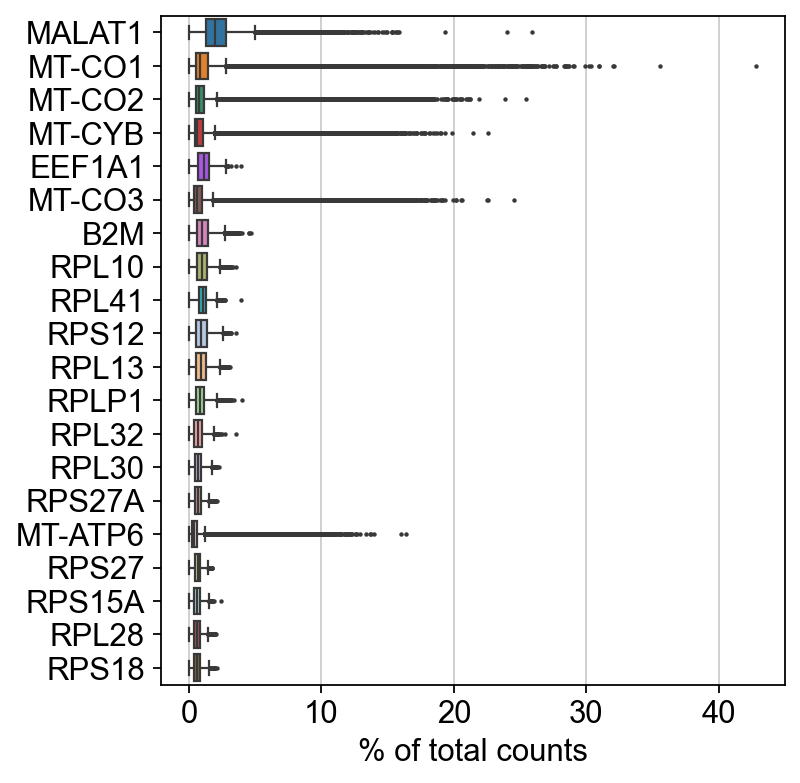

In [13]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [14]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
adata.var['rb'] = adata.var_names.str.startswith(('RPS','RPL'))  # annotate the group of ribosomal proteins as 'rb'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(adata, qc_vars=['rb'], percent_top=None, log1p=False, inplace=True)

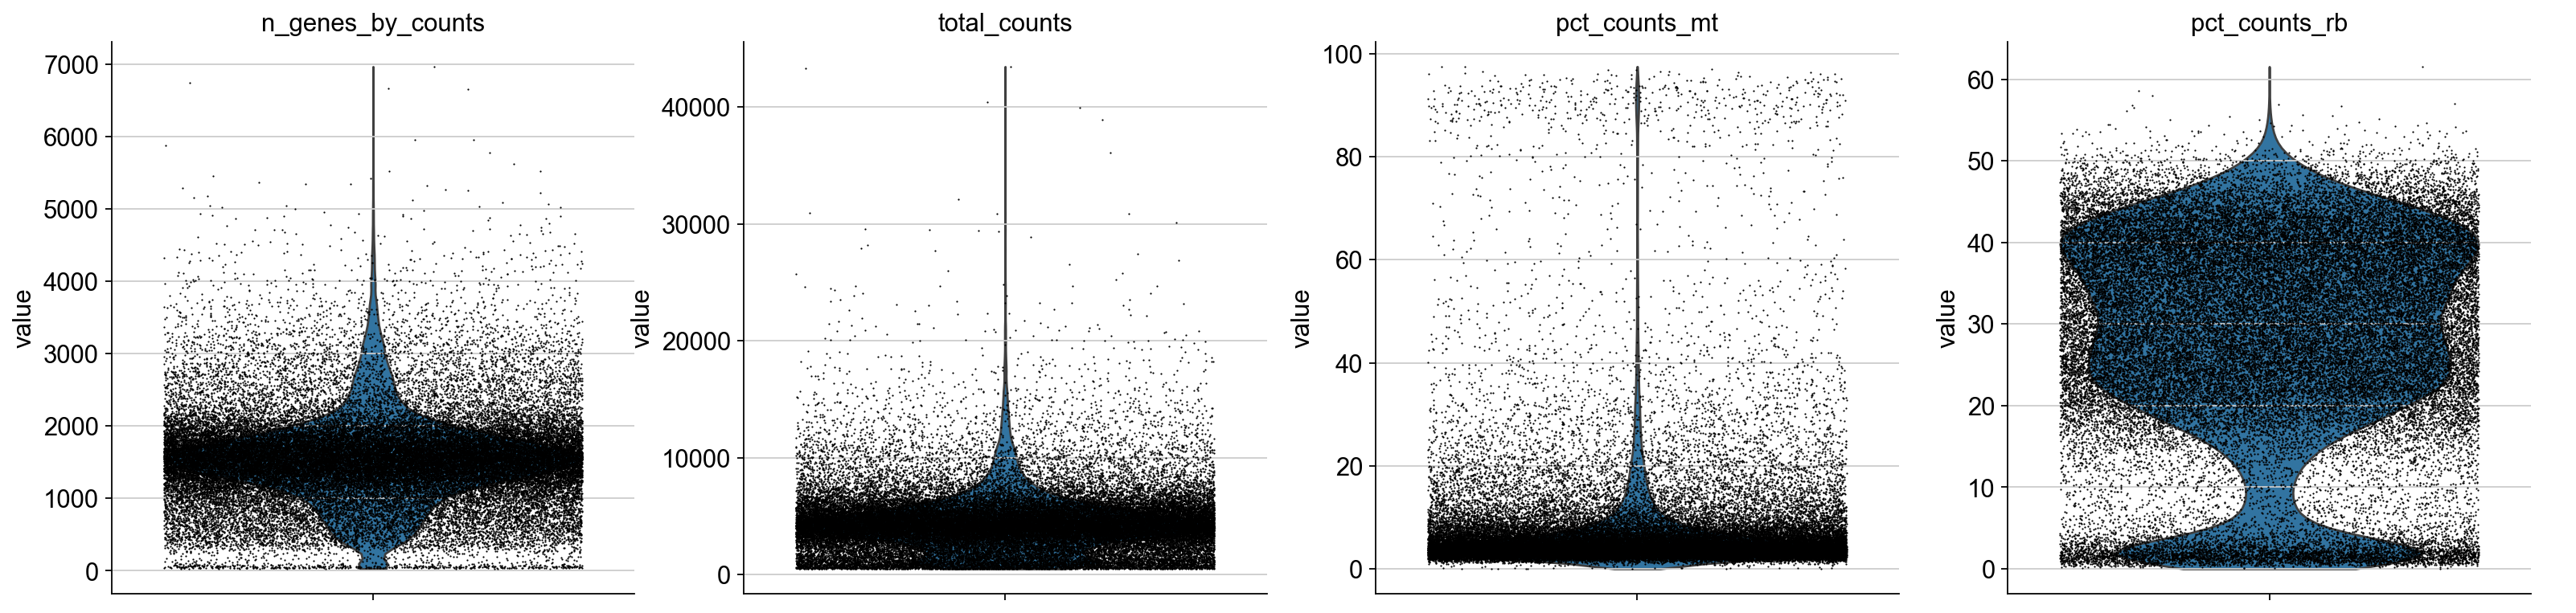

In [15]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_rb'], 
             jitter=0.4, multi_panel=True)

In [16]:
adata.obs.head()

,sample_id,donor_id,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_rb,pct_counts_rb
AAACCTGAGAGTCTGG-1__BO1-BLD-0-SC-1a,BO1-BLD-0-SC-1a,BO1,1720,4131.0,142.0,3.437424,966.0,23.384169
AAACCTGAGATAGCAT-1__BO1-BLD-0-SC-1a,BO1-BLD-0-SC-1a,BO1,1972,7269.0,124.0,1.705874,3040.0,41.821434
AAACCTGAGCGACGTA-1__BO1-BLD-0-SC-1a,BO1-BLD-0-SC-1a,BO1,1379,4909.0,190.0,3.870442,2109.0,42.961906
AAACCTGAGCGCTCCA-1__BO1-BLD-0-SC-1a,BO1-BLD-0-SC-1a,BO1,1735,5368.0,281.0,5.234724,1814.0,33.792847
AAACCTGAGGGCATGT-1__BO1-BLD-0-SC-1a,BO1-BLD-0-SC-1a,BO1,1293,2672.0,474.0,17.739521,477.0,17.851797


In [17]:
adata = adata[adata.obs.pct_counts_mt < 20, :]  # filter out cells with high mitochondrial content

In [18]:
adata

View of AnnData object with n_obs × n_vars = 46205 × 25466
    obs: 'sample_id', 'donor_id', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb'
    var: 'n_cells', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [19]:
adata.write("processed/raw_liberal_filt.h5ad")

In [20]:
sc.pp.scrublet(adata, batch_key='sample_id')

Running Scrublet
filtered out 4031 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
    using data matrix X directly
Automatically set threshold at doublet score = 0.65
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.5%
filtered out 4082 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.

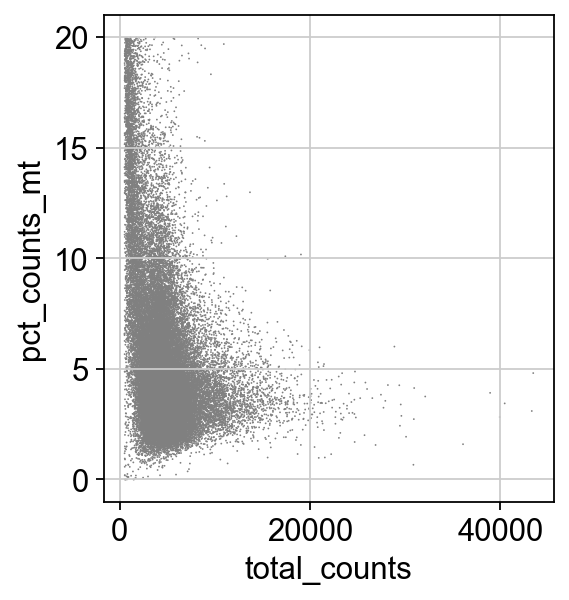

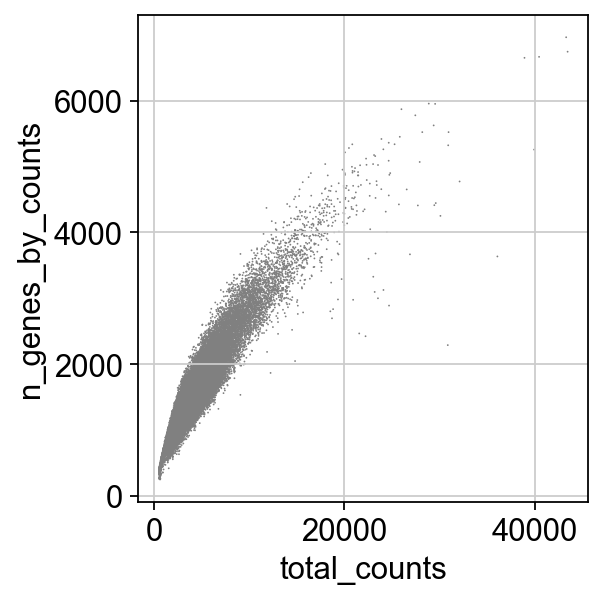

In [21]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

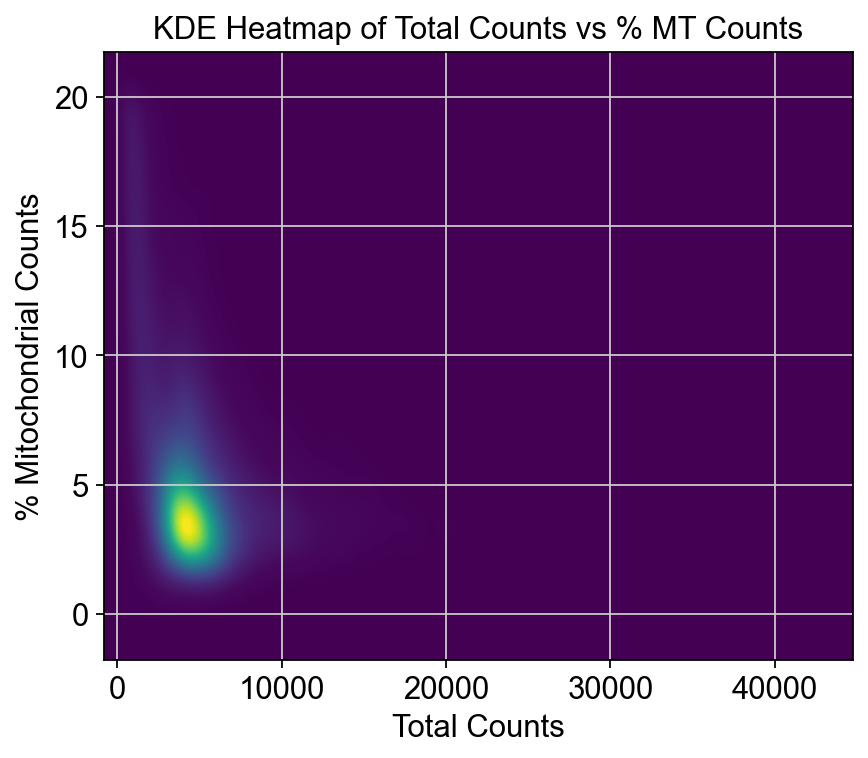

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame from the AnnData object
df = adata.obs[['total_counts', 'pct_counts_mt']].copy()

# Drop NaNs if present
df.dropna(inplace=True)

# Plot KDE heatmap
plt.figure(figsize=(6, 5))
sns.kdeplot(
    data=df,
    x='total_counts',
    y='pct_counts_mt',
    fill=True,
    cmap="viridis",  # or other color maps like "mako", "rocket", etc.
    thresh=0,
    levels=100
)
plt.xlabel('Total Counts')
plt.ylabel('% Mitochondrial Counts')
plt.title('KDE Heatmap of Total Counts vs % MT Counts')
plt.show()


In [23]:
def plot_kde_heatmap(adata, x, y, cmap='viridis', figsize=(5, 4), title = 'scatter with KDE overlay'):
    """
    Plot a KDE heatmap for two variables in an AnnData object.

    Parameters:
    - adata: AnnData object containing the data.
    - x: Variable name for the x-axis.
    - y: Variable name for the y-axis.
    - cmap: Colormap to use for the heatmap.
    - figsize: Size of the figure.
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd
    import matplotlib.colors as mcolors

    # Create white-to-red colormap
    white_red = mcolors.LinearSegmentedColormap.from_list("white_red", ["white", "red"])

    # Extract data
    df = adata.obs[[x, y]].copy()
    df.dropna(inplace=True)

    # Plot
    plt.figure(figsize=(7, 6))

    # Scatter plot
    plt.scatter(
        df[x],
        df[y],
        s=5, alpha=0.3, color='gray', label='Cells'
    )

    # KDE overlay
    sns.kdeplot(
        data=df,
        x=x,
        y=y,
        cmap=white_red,
        fill=True,
        alpha=0.6,
        levels=50,
        thresh=0
    )

    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


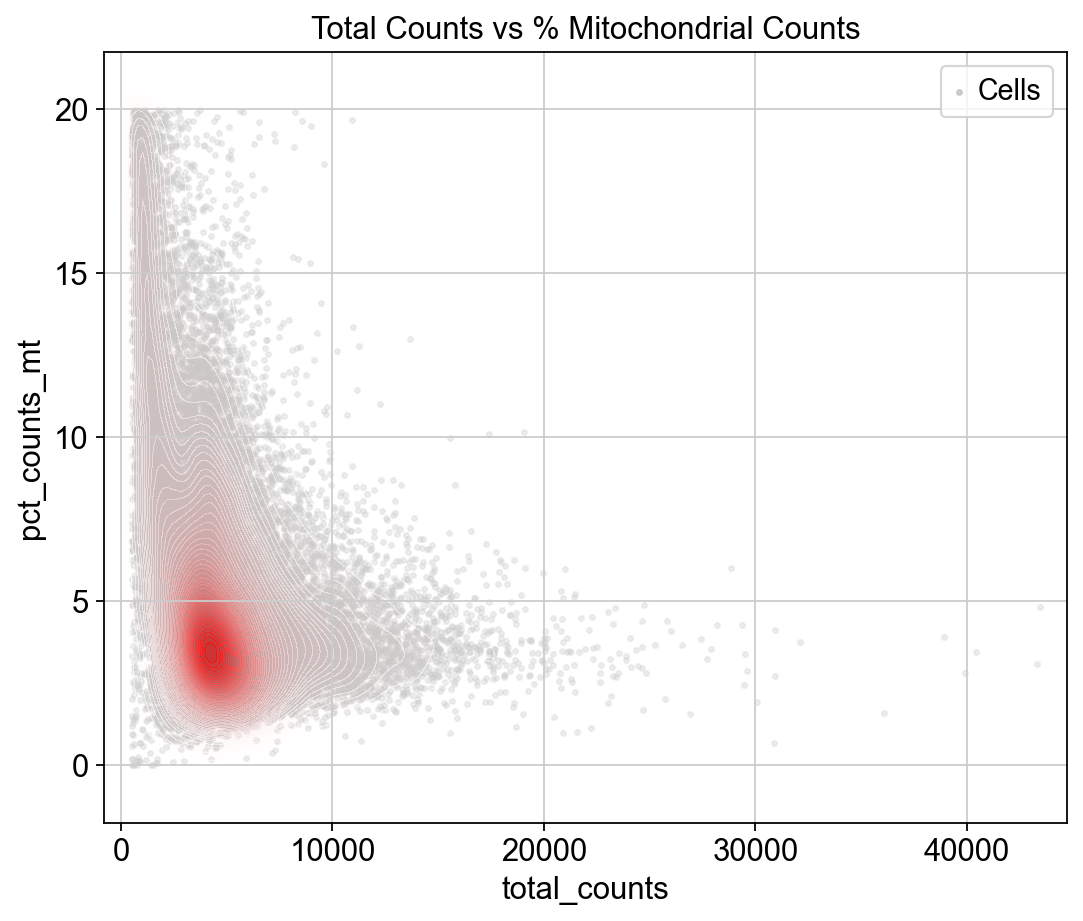

In [24]:
plot_kde_heatmap(adata, 'total_counts', 'pct_counts_mt', title='Total Counts vs % Mitochondrial Counts')

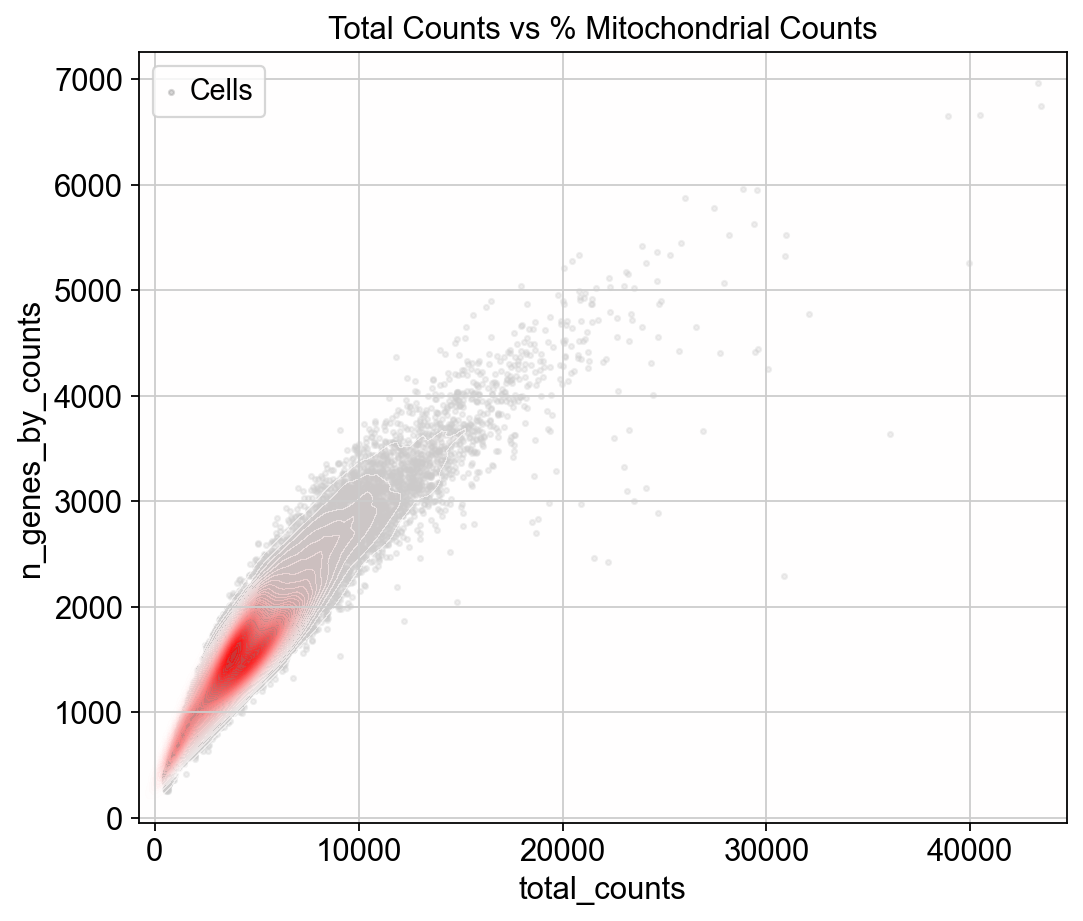

In [25]:
plot_kde_heatmap(adata, x='total_counts', y='n_genes_by_counts', title='Total Counts vs % Mitochondrial Counts')

In [26]:
adata = adata[(adata.obs.pct_counts_mt < 5)]

In [27]:
adata.describe()

**** Highly likely data is raw
-----
(X) min = 0.0 | max = 15703.0 
-----
(head 100 cells) umi_sum min =  2433.0 | umi_sum max =  19489.0 | cellmean =   5465.394
-----
View of AnnData object with n_obs × n_vars = 28898 × 25466
    obs: 'sample_id', 'donor_id', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'n_cells', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'scrublet'


In [28]:
adata.obs.predicted_doublet.value_counts()
adata = adata[~adata.obs.predicted_doublet]
adata.shape

(28069, 25466)

In [29]:
# upper limit
adata = adata[(adata.obs.n_genes_by_counts < 4000) & (adata.obs.total_counts < 20000)]
adata.shape

(27895, 25466)

In [30]:
adata.obs.head()

,sample_id,donor_id,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_rb,pct_counts_rb,n_genes,doublet_score,predicted_doublet
AAACCTGAGAGTCTGG-1__BO1-BLD-0-SC-1a,BO1-BLD-0-SC-1a,BO1,1720,4131.0,142.0,3.437424,966.0,23.384169,1720,0.027535,False
AAACCTGAGATAGCAT-1__BO1-BLD-0-SC-1a,BO1-BLD-0-SC-1a,BO1,1972,7269.0,124.0,1.705874,3040.0,41.821434,1972,0.034132,False
AAACCTGAGCGACGTA-1__BO1-BLD-0-SC-1a,BO1-BLD-0-SC-1a,BO1,1379,4909.0,190.0,3.870442,2109.0,42.961906,1379,0.043624,False
AAACCTGAGGTGACCA-1__BO1-BLD-0-SC-1a,BO1-BLD-0-SC-1a,BO1,1735,6115.0,201.0,3.286999,2406.0,39.345871,1735,0.052235,False
AAACCTGCAGAGTGTG-1__BO1-BLD-0-SC-1a,BO1-BLD-0-SC-1a,BO1,1510,3401.0,140.0,4.116436,875.0,25.727728,1510,0.048301,False


/Users/vm11/SKIN_WARTS/.venv/lib/python3.9/site-packages/scanpy/plotting/_utils.py:487: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


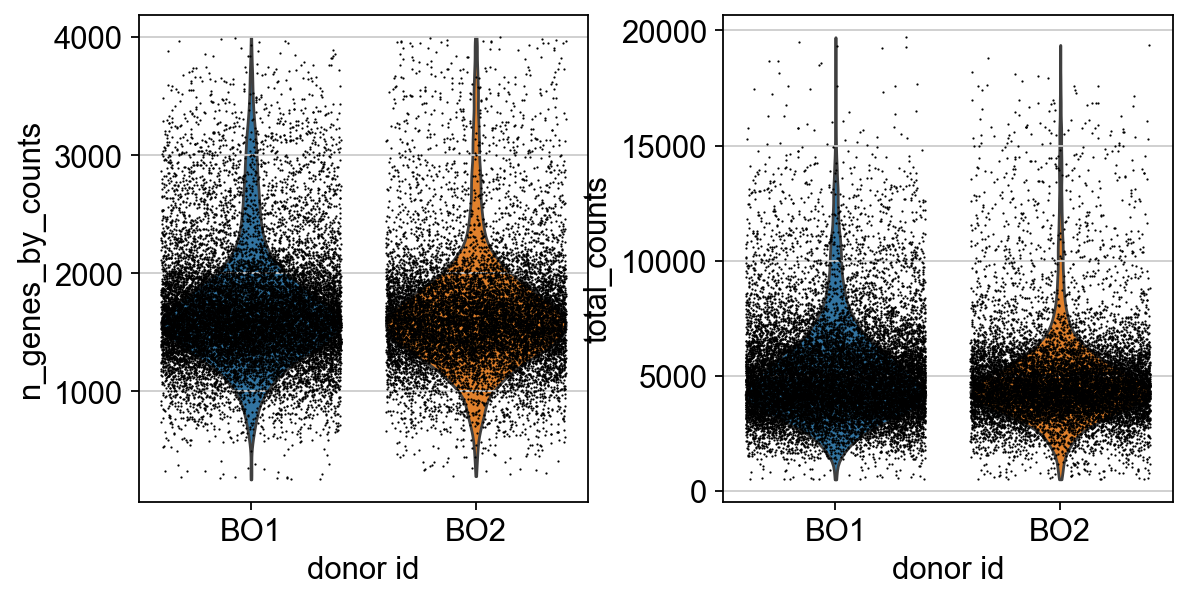

In [31]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'], groupby='donor_id', jitter=0.4, multi_panel=True)

In [32]:
adata = adata[(adata.obs.n_genes_by_counts > 200) & (adata.obs.total_counts < 20000)]
adata.shape

(27895, 25466)